# Шаг №1 - Подготовка данных

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 18)

df = pd.read_csv('diabetes (2).csv')

In [2]:
df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [3]:
df.isnull().sum()

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [5]:
float_cols = df.select_dtypes(include=['float']).columns
df[float_cols] = df[float_cols].astype(int) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             4303 non-null   int64
 1   Gender          4303 non-null   int64
 2   BMI             4303 non-null   int32
 3   SBP             4303 non-null   int64
 4   DBP             4303 non-null   int64
 5   FPG             4303 non-null   int32
 6   Chol            4303 non-null   int32
 7   Tri             4303 non-null   int32
 8   HDL             4303 non-null   int32
 9   LDL             4303 non-null   int32
 10  ALT             4303 non-null   int32
 11  BUN             4303 non-null   int32
 12  CCR             4303 non-null   int32
 13  FFPG            4303 non-null   int32
 14  smoking         4303 non-null   int32
 15  drinking        4303 non-null   int32
 16  family_histroy  4303 non-null   int64
 17  Diabetes        4303 non-null   int64
dtypes: int32(12), int64(6)
memor

In [7]:
df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20,119,81,5,4,0,0,2,12,5,63,5,3,3,0,0
1,40,1,17,97,54,4,3,1,1,2,9,3,70,4,1,1,0,0
2,40,2,19,85,53,5,5,1,1,3,10,4,61,4,3,3,0,0
3,43,1,23,111,71,4,4,0,1,2,36,4,73,5,2,3,0,0
4,36,1,26,130,82,5,6,3,0,3,69,3,67,5,3,3,0,0


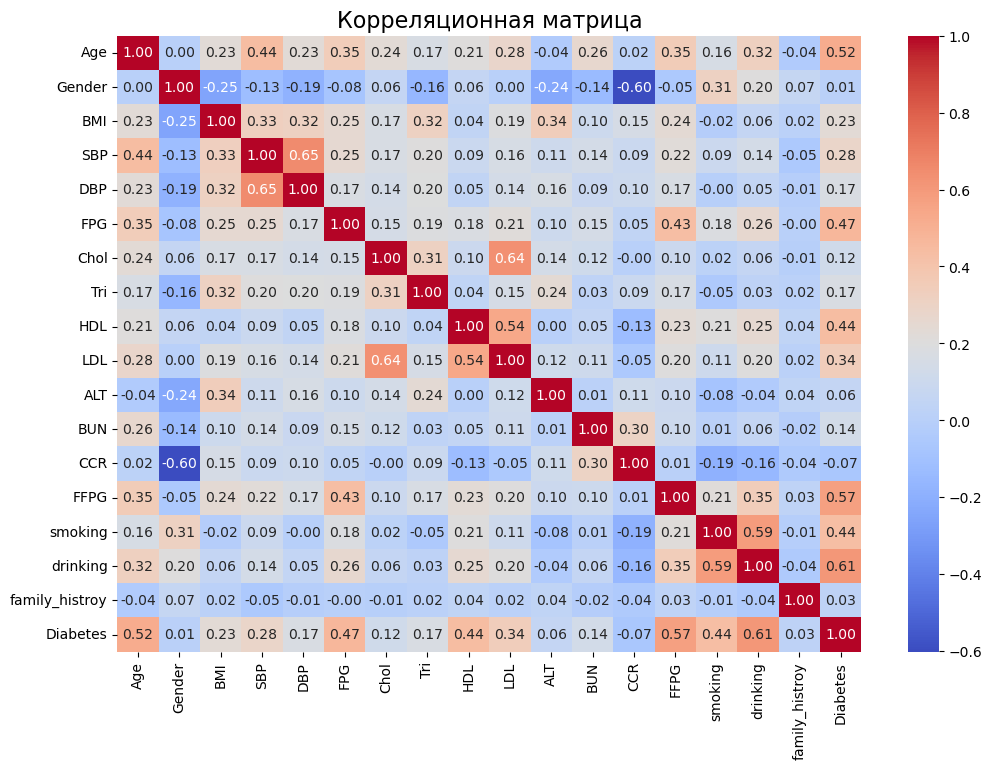

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Показываем график
plt.title("Корреляционная матрица", fontsize=16)
plt.show()

# Шаг №2 - Разделение данных на тренировочную и тестовую выборки

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Diabetes') 
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Шаг №3: Создание моделя

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier

# Определяем параметры для перебора
param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.01, 0.1],
    'max_depth': [2, 4, 6, 8],
    'l2_leaf_reg': [2, 4, 6, 8],
    'rsm': [0.3, 0.5, 0.6],
}

# Инициализация модели
model = CatBoostClassifier(verbose=0)

# GridSearchCV для поиска лучших параметров
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Метрика для оптимизации
    cv=kfold,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

# Получение лучших параметров и модели
best_model = grid_search.best_estimator_
print("Best score (GridSearch):", round(grid_search.best_score_, 4))
print("Best parameters (GridSearch):", grid_search.best_params_)

# Обучение модели с лучшими параметрами
best_model.fit(X_train_scaled, y_train)

# Прогнозы на валидационном наборе
y_pred = best_model.predict(X_test_scaled)

# Простая кросс-валидация
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_predictions = cross_val_predict(best_model, X_train_scaled, y_train, cv=kf)

# Метрики на валидационном наборе
val_accuracy = accuracy_score(y_test, y_pred)
val_precision = precision_score(y_test, y_pred)
val_recall = recall_score(y_test, y_pred)
val_f1 = f1_score(y_test, y_pred)

# Метрики на кросс-валидации
cv_accuracy = accuracy_score(y_train, cv_predictions)
cv_precision = precision_score(y_train, cv_predictions)
cv_recall = recall_score(y_train, cv_predictions)
cv_f1 = f1_score(y_train, cv_predictions)

# Шаг №4 - Оценка модели

In [ ]:
# Вывод метрик
print("\nValidation Metrics:")
print(f"Accuracy: {val_accuracy:.3f}")
print(f"Precision: {val_precision:.3f}")
print(f"Recall: {val_recall:.3f}")
print(f"F1-Score: {val_f1:.3f}")

print("\nCross-Validation Metrics:")
print(f"Accuracy: {cv_accuracy:.3f}")
print(f"Precision: {cv_precision:.3f}")
print(f"Recall: {cv_recall:.3f}")
print(f"F1-Score: {cv_f1:.3f}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

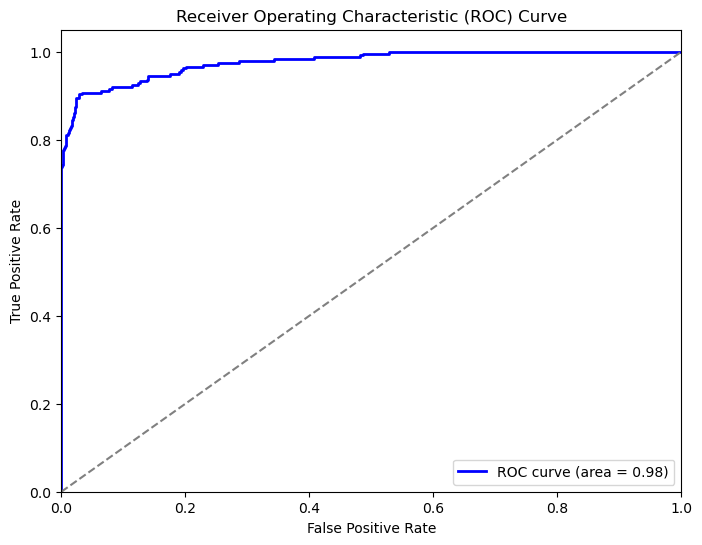

In [16]:
from sklearn.metrics import roc_curve, auc

# Вычисляем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1])

# Строим ROC кривую
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()